* In doing this analysis it appears that attempting EDA on the dataframes Location_df and Type_df proves futile. 

  * This is primarily due to the fact that after creating dummy variables for the location and breach types the data has been split into 0's and 1's which spread the data too thin. 
  
  * Below, you will find that heatmaps work best with Location_df and Type_df, yet any other graph proves futile.

In [12]:
# Beginning EDA on main_df
# Scatter, line, and box plots will be shown, also heatmaps

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_encoded = pd.read_csv('Data/df_encoded.csv')
main_df = pd.read_csv('Data/main_df.csv', parse_dates = ['year'])
Location_df = pd.read_csv('Data/Location_df.csv')
Type_df = pd.read_csv('Data/Type_df.csv')

main_df

,Intrusion_ID,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Date_Posted_or_Updated,breach_start,year,Location_ID,Type_ID
0,0,Brooke Army Medical Center,TX,1000,10/16/2009,2014-06-30,2009-10-16,2009-01-01,0,0
1,1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,2014-05-30,2009-09-22,2009-01-01,1,1
2,3,Health Services for Children with Special Need...,DC,3800,10/9/2009,2014-01-23,2009-10-09,2009-01-01,2,2
3,4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,2014-01-23,2009-09-27,2009-01-01,3,3
4,5,"David I. Cohen, MD",CA,857,9/27/2009,2014-01-23,2009-09-27,2009-01-01,4,4
...,...,...,...,...,...,...,...,...,...,...
761,1043,Aetna Life Insurance Company,CT,3814,4/2/2014,2014-06-18,2014-04-02,2014-01-01,761,761
762,1046,Mark A. Gillispie,CA,5845,11/20/2013,2014-06-27,2013-11-20,2013-01-01,762,762
763,1050,Puerto Rico Health Insurance,PR,28413,9/20/2013,2014-06-27,2013-09-20,2013-01-01,763,763
764,1051,"Hospitalists of Brandon, LLC",FL,1831,2/11/2014,2014-06-27,2014-02-11,2014-01-01,764,764


In [13]:
main_df.head()

,Intrusion_ID,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Date_Posted_or_Updated,breach_start,year,Location_ID,Type_ID
0,0,Brooke Army Medical Center,TX,1000,10/16/2009,2014-06-30,2009-10-16,2009-01-01,0,0
1,1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,2014-05-30,2009-09-22,2009-01-01,1,1
2,3,Health Services for Children with Special Need...,DC,3800,10/9/2009,2014-01-23,2009-10-09,2009-01-01,2,2
3,4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,2014-01-23,2009-09-27,2009-01-01,3,3
4,5,"David I. Cohen, MD",CA,857,9/27/2009,2014-01-23,2009-09-27,2009-01-01,4,4


In [14]:
#

main_df['year_1'] = main_df['year'].dt.year

main_df['year_1']

0      2009
1      2009
2      2009
3      2009
4      2009
       ... 
761    2014
762    2013
763    2013
764    2014
765    2014
Name: year_1, Length: 766, dtype: int64

In [15]:
main_df.describe()

,Intrusion_ID,Individuals_Affected,Location_ID,Type_ID,year_1
count,766.000000,7.660000e+02,766.000000,766.000000,766.000000
mean,521.167102,3.153158e+04,382.500000,382.500000,2011.463446
std,301.283560,2.483765e+05,221.269444,221.269444,1.576161
min,0.000000,5.000000e+02,0.000000,0.000000,1997.000000
25%,260.250000,9.555000e+02,191.250000,191.250000,2010.000000
50%,532.500000,2.357000e+03,382.500000,382.500000,2012.000000
75%,773.750000,6.862500e+03,573.750000,573.750000,2013.000000
max,1054.000000,4.900000e+06,765.000000,765.000000,2014.000000


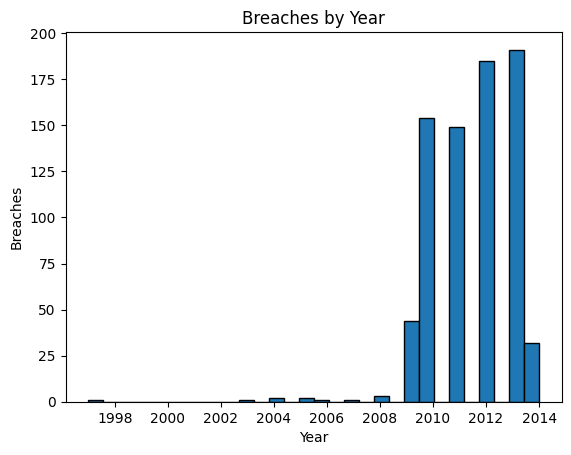

In [16]:
plt.hist(main_df['year'], bins = 30, edgecolor = 'black')

plt.xlabel('Year')

plt.ylabel('Breaches')

plt.title('Breaches by Year')

plt.show()


# Here we can see that the majority of breaches occur around years 2009-2012

In [17]:
df_encoded

,Unnamed: 0,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Date_Posted_or_Updated,breach_start,year,Type_of_Breach_Hacking/IT Incident,Type_of_Breach_Improper Disposal,Type_of_Breach_Loss,Type_of_Breach_Other,Type_of_Breach_Theft,Type_of_Breach_Unauthorized Access/Disclosure,Location_of_Breached_Information_Desktop Computer,Location_of_Breached_Information_Laptop,Location_of_Breached_Information_Network Server,Location_of_Breached_Information_Other,Location_of_Breached_Information_Other Portable Electronic Device,Location_of_Breached_Information_Paper
0,0,Brooke Army Medical Center,TX,1000,10/16/2009,2014-06-30,2009-10-16,2009,0,0,0,0,1,0,0,0,0,0,0,1
1,1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,2014-05-30,2009-09-22,2009,0,0,0,0,1,0,0,0,1,0,0,0
2,3,Health Services for Children with Special Need...,DC,3800,10/9/2009,2014-01-23,2009-10-09,2009,0,0,1,0,0,0,0,1,0,0,0,0
3,4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,2014-01-23,2009-09-27,2009,0,0,0,0,1,0,1,0,0,0,0,0
4,5,"David I. Cohen, MD",CA,857,9/27/2009,2014-01-23,2009-09-27,2009,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,1043,Aetna Life Insurance Company,CT,3814,4/2/2014,2014-06-18,2014-04-02,2014,0,0,0,0,1,0,0,1,0,0,0,0
762,1046,Mark A. Gillispie,CA,5845,11/20/2013,2014-06-27,2013-11-20,2013,0,0,0,0,1,0,1,0,0,0,0,0
763,1050,Puerto Rico Health Insurance,PR,28413,9/20/2013,2014-06-27,2013-09-20,2013,0,0,0,0,1,0,0,0,0,1,0,0
764,1051,"Hospitalists of Brandon, LLC",FL,1831,2/11/2014,2014-06-27,2014-02-11,2014,1,0,0,0,0,0,0,0,0,1,0,0


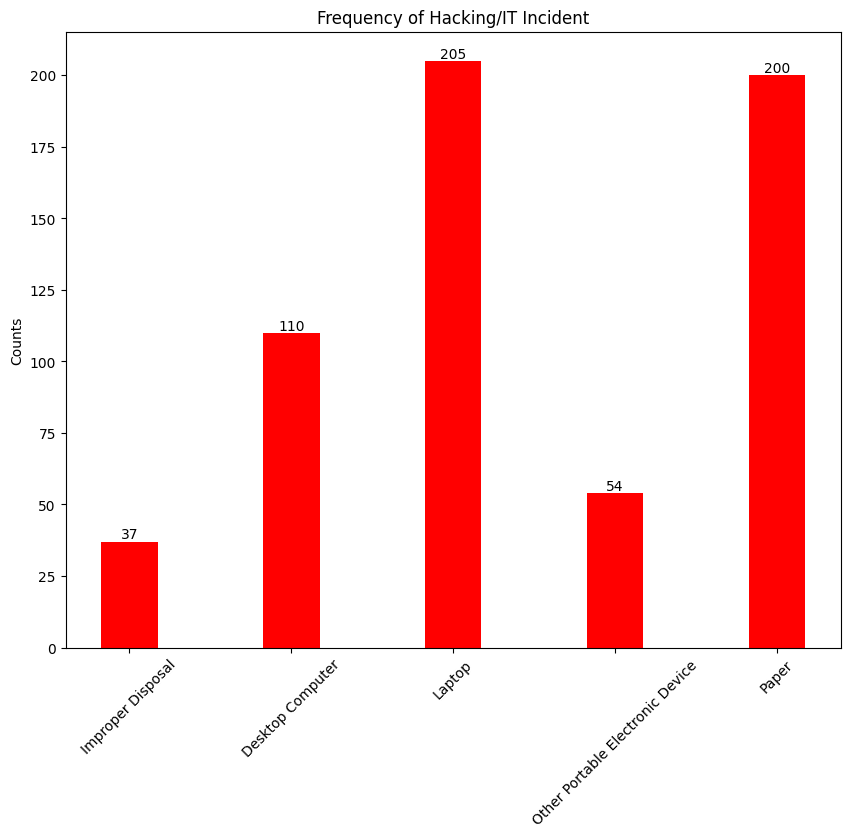

In [18]:
# Categories I want to count in frequencies

categories = [
    'Type_of_Breach_Improper Disposal',
    'Location_of_Breached_Information_Desktop Computer',
    'Location_of_Breached_Information_Laptop',
    'Location_of_Breached_Information_Other Portable Electronic Device',
    'Location_of_Breached_Information_Paper'
]

# Create a dictionary with category counts
# For each category in the categories list, filter the dataframe where the category equals 1, 
# then get the number of rows (which corresponds to the count) and store it in the dictionary.

counts = {category: df_encoded.loc[df_encoded[category] == 1].shape[0] for category in categories}

# Set the bar width and figsize

bar_width = 0.35
plt.figure(figsize = (10, 8))

# For each category and count, plot a bar and a label. np.arange(len(categories)) will generate
# a sequence of numbers from 0 to len(categories), which we'll use for the x positions of the bars.

for i, (category, count) in enumerate(counts.items()):
    plt.bar(i, count, color = 'red', width = bar_width, label = category.split('_')[-1])
    plt.text(i, count, str(count), ha = 'center', va = 'bottom')

# Set the x-axis labels to the categories and rotate them for better visibility

plt.xticks(np.arange(len(categories)), [category.split('_')[-1] for category in categories], rotation = 45)

# Set the y-axis label

plt.ylabel('Counts')

# Set the title

plt.title('Frequency of Hacking/IT Incident')

# Display the chart

plt.show()

In [19]:
# I want to see all of the hospital names to create a general list of keywords

df_encoded['Name_of_Covered_Entity'].unique()


array(['Brooke Army Medical Center',
       'Mid America Kidney Stone Association, LLC',
       'Health Services for Children with Special Needs, Inc.',
       'L. Douglas Carlson, M.D.', 'David I. Cohen, MD',
       'Michele Del Vicario, MD', 'Joseph F. Lopez, MD',
       'Mark D. Lurie, MD', 'City of Hope National Medical Center',
       "The Children's Hospital of Philadelphia",
       'Cogent Healthcare of Wisconsin, S.C.', 'Universal American',
       'Kern Medical Center',
       'Detroit Department of Health and Wellness Promotion',
       'Massachusetts Eye and Ear Infirmary',
       'BlueCross BlueShield Association',
       'Blue Island Radiology Consultants',
       'Goodwill Industries of Greater Grand Rapids, Inc.', 'Concentra',
       'Ashley and Gray DDS', 'Advocate Health Care',
       'The Methodist Hospital',
       'University of California, San Francisco',
       'Educators Mutual Insurance Association of Utah ',
       'University Medical Center of Southern Nevada'

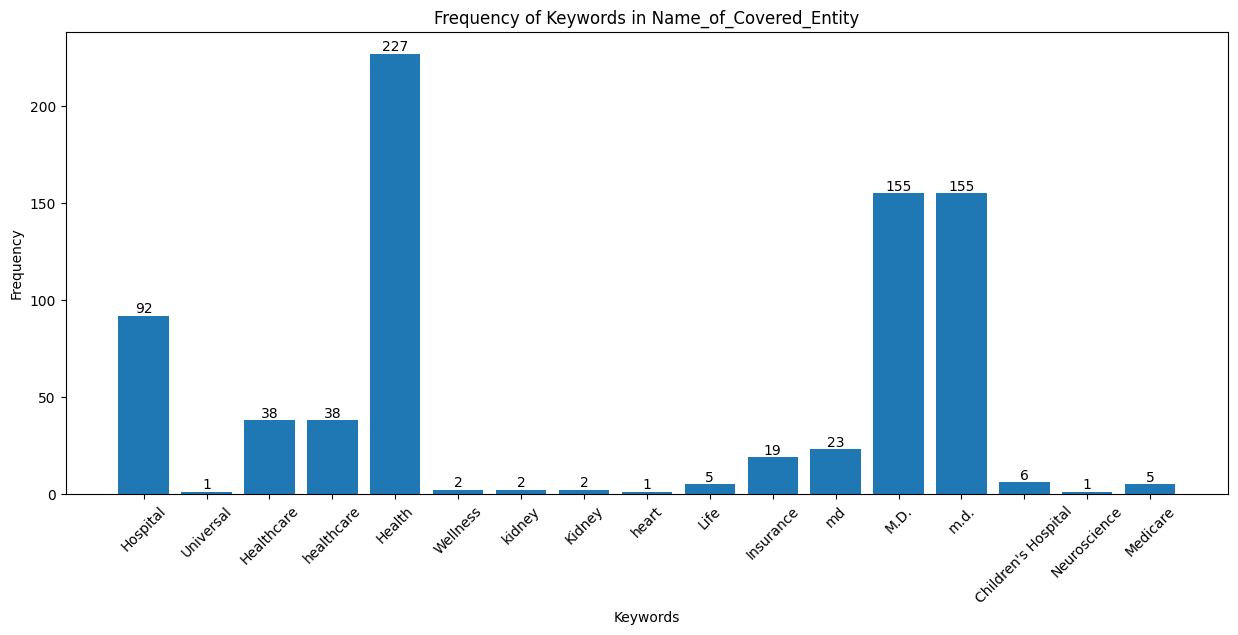

In [20]:
# I will create a function that returns the specified data, then plot it 
# to convey how many of each of the specified data is in the entire dataframe

# Create a function that returns specified keywords

def plot_keyword_frequency(df_encoded):

    keywords = ["Hospital", "Universal", "Healthcare", "healthcare", "Health", "Wellness", "kidney", "Kidney", 
    "heart", "Life", "Insurance", "md", "M.D.", "m.d.", "Children's Hospital", "Neuroscience", "Medicare"]

    keyword_counts = []

    for keyword in keywords:

        count = df_encoded['Name_of_Covered_Entity'].str.contains(keyword, case = False).sum()

        keyword_counts.append(count)

    # Set the figure size

    plt.figure(figsize = (15, 6))

    # Create a bar plot

    plt.bar(keywords, keyword_counts)

    # Add value labels on top of each bar

    for i, count in enumerate(keyword_counts):

        plt.text(i, count, str(count), ha = 'center', va = 'bottom')

    # Set the labels and title

    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.title('Frequency of Keywords in Name_of_Covered_Entity')

    # Rotate the x-axis labels if needed

    plt.xticks(rotation = 45)

    # Show the plot

    plt.show()


plot_keyword_frequency(df_encoded)

# After plotting, it could be said that some of the strings represent 
# each other regardless of spelling, such as 'kidney' and 'Kidney'. One exception is 'md' and 'm.d.'
# I believe it's safe to assume so, therefore I'll binarize these keywords into their own columns


In [21]:
# In this part, I'll first create a new list of keywords, then 
# binarize our keywords into individual columns for a better analysis. 
# For the sake of our analysis, I'm going to choose the highest numbered
# bars and the children's hospital and insurance bars


# Create a function that returns specified keywords and binarize it

def create_keyword_dataframe(df_encoded):
    keywords = ["Hospital", "Universal", "Healthcare", "Health", "Wellness", "Kidney",
                "heart", "Life", "Insurance", "md", "M.D.", "Childrens Hospital", "Neuroscience", "Medicare"]

    # Create an empty dataframe to store the binarized columns

    keyword_df = pd.DataFrame()  

    for keyword in keywords:

        # Create a binary column for the current keyword

        binary_column = pd.Series(df_encoded['Name_of_Covered_Entity'].str.contains(keyword, case = False).astype(int))

        # Add the binary column to the keyword dataframe

        keyword_df[keyword] = binary_column

    return keyword_df


keyword_df = create_keyword_dataframe(df_encoded)

# Print the keyword dataframe

keyword_df

,Hospital,Universal,Healthcare,Health,Wellness,Kidney,heart,Life,Insurance,md,M.D.,Childrens Hospital,Neuroscience,Medicare
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0,0,0,0,0,0,0,1,1,0,0,0,0,0
762,0,0,0,0,0,0,0,0,0,0,0,0,0,0
763,0,0,0,1,0,0,0,0,1,0,0,0,0,0
764,1,0,0,0,0,0,0,0,0,0,0,0,0,0


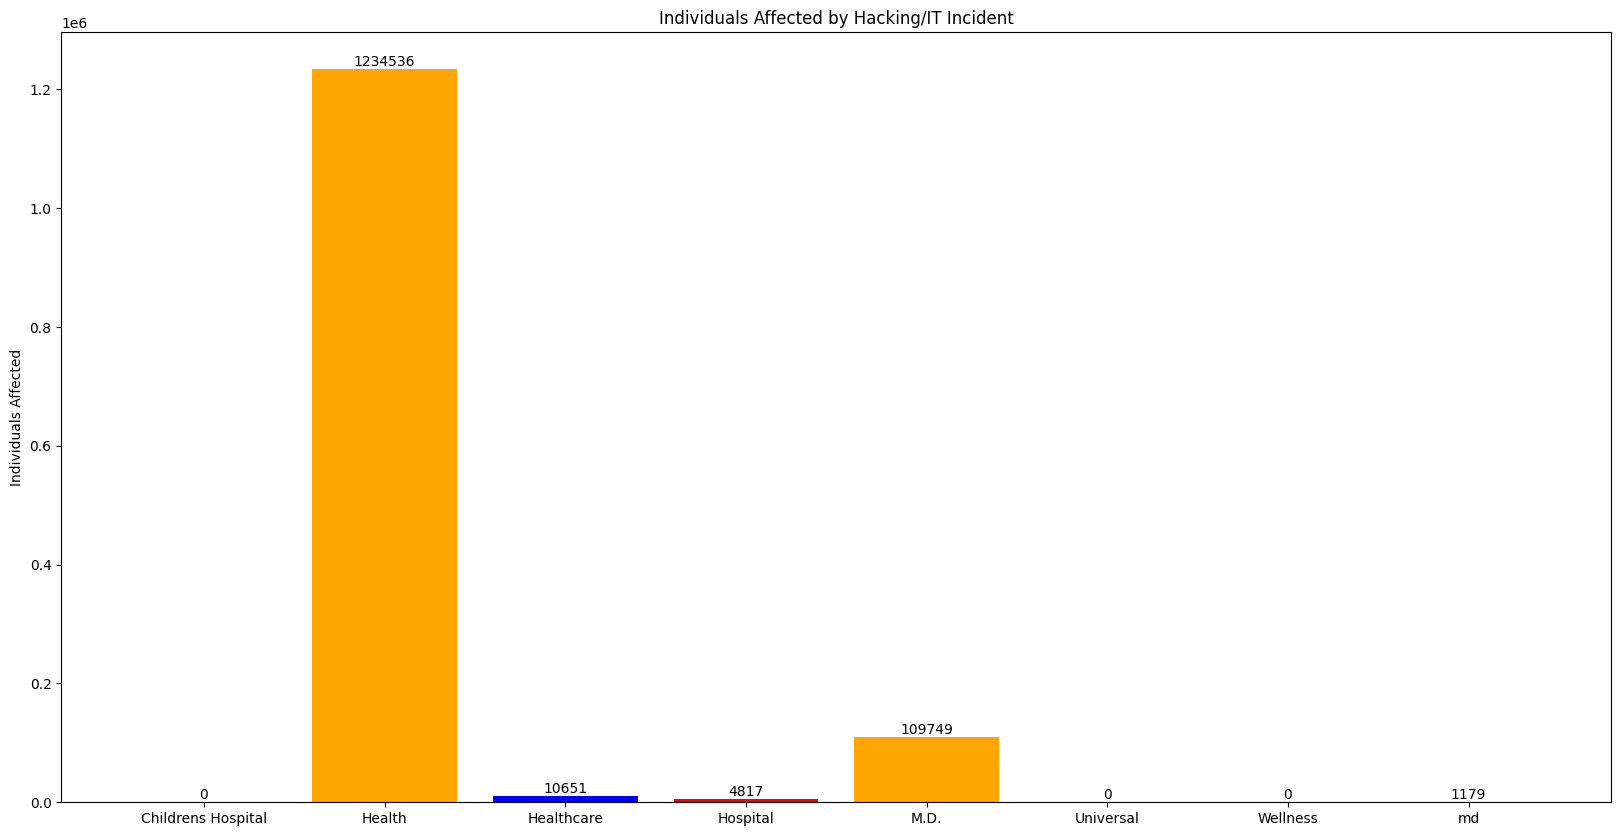

In [22]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Type_of_Breach_Hacking/IT Incident'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Hacking/IT Incident')

# Display the plot

plt.show()



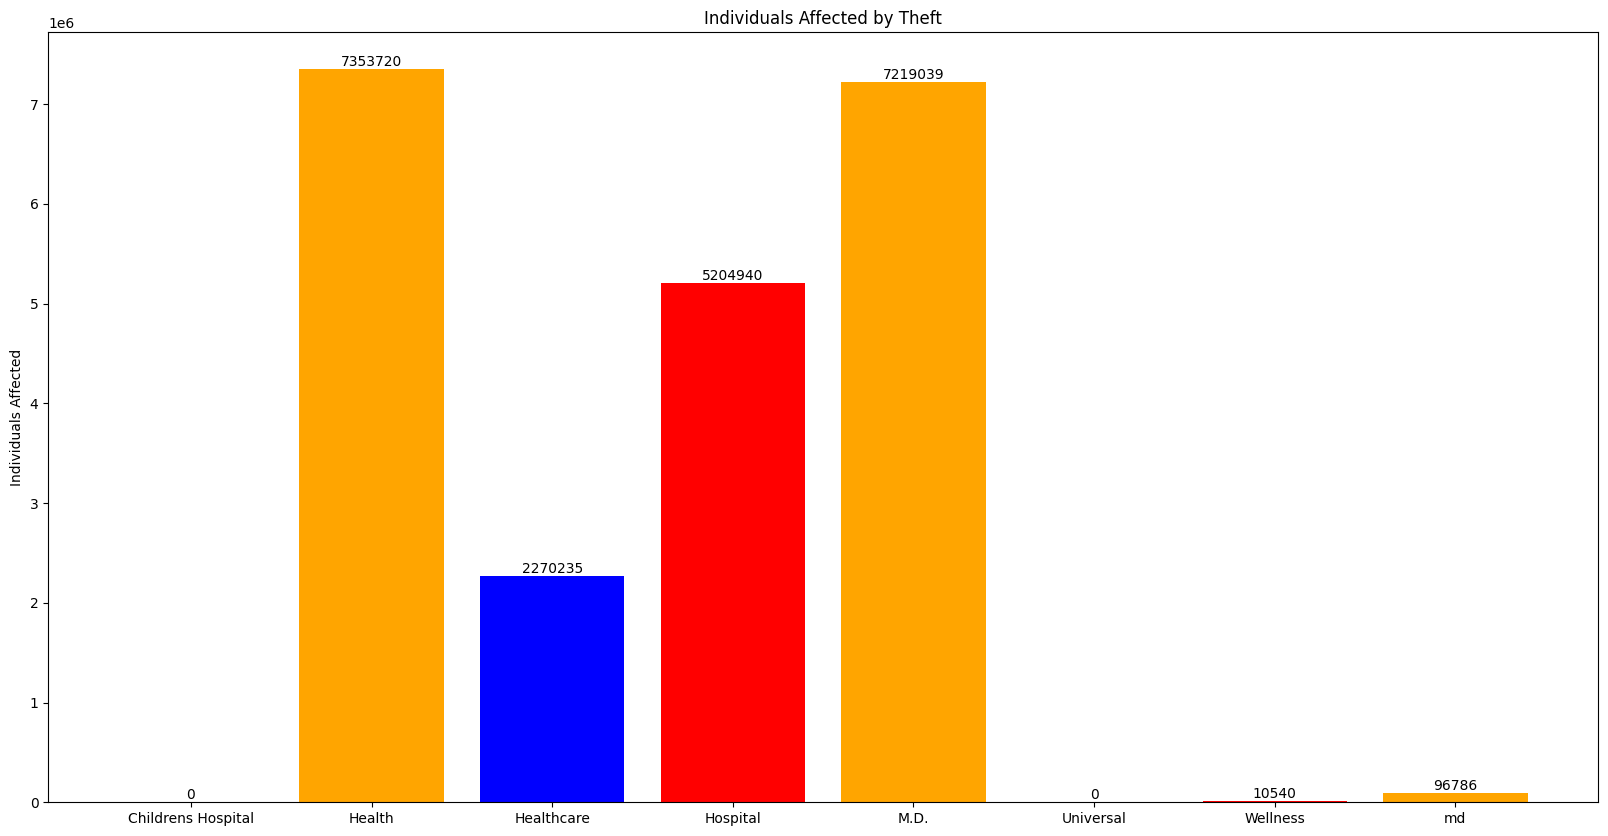

In [26]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Type_of_Breach_Theft'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Theft')

# Display the plot

plt.show()

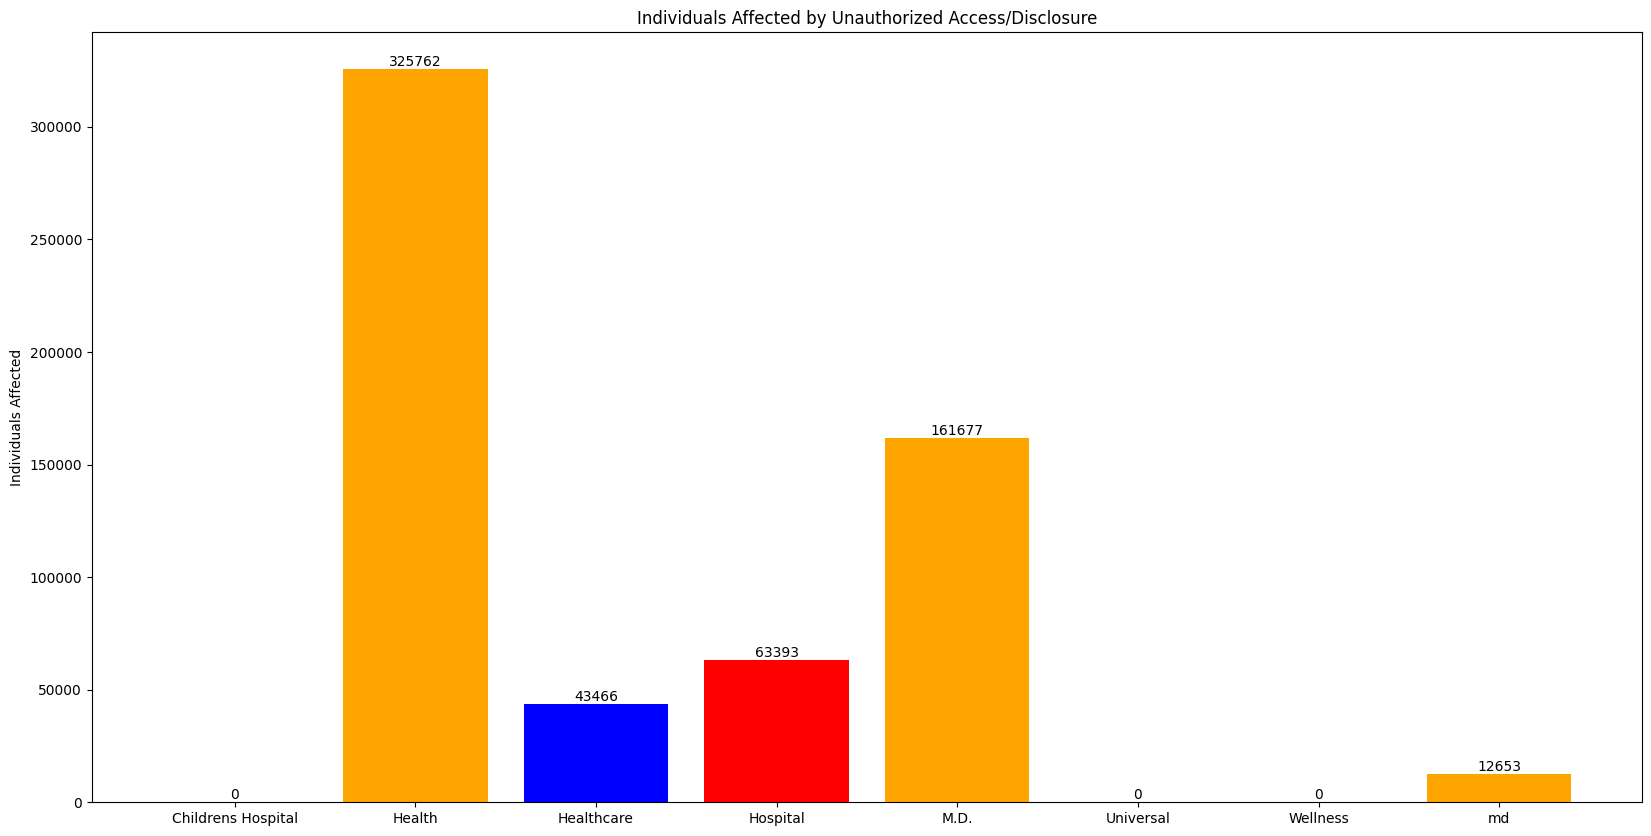

In [28]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Type_of_Breach_Unauthorized Access/Disclosure'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Unauthorized Access/Disclosure')

# Display the plot

plt.show()

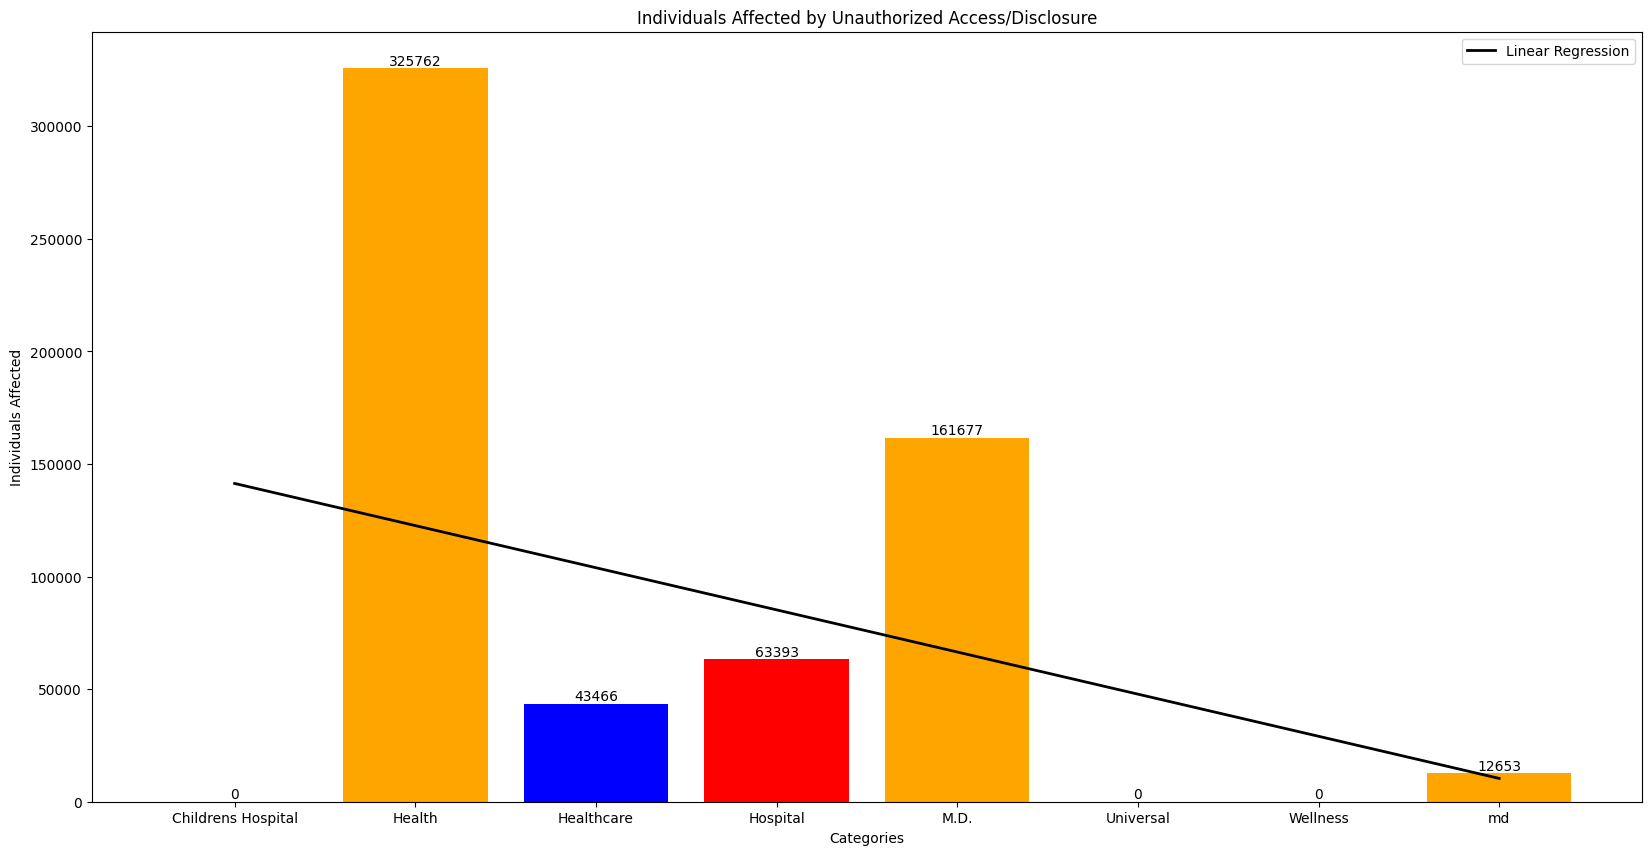

In [31]:
from sklearn.linear_model import LinearRegression


# Define the x and y variables

# Independent variable (categories)

x = np.arange(len(categories)).reshape(-1, 1)  

# Dependent variable (Individuals Affected)

y = np.array(values)  

# Create the linear regression model

model = LinearRegression()

# Fit the model to the data

model.fit(x, y)

# Create the linear regression model

model = LinearRegression()

# Fit the model to the data

model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

# Generate the predicted values based on the regression line

predicted_y = model.predict(x)

# Set the figure size

plt.figure(figsize = (20, 10))

# Create a scatter plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')

# Plot the regression line

plt.plot(x, predicted_y, color = 'black', linewidth = 2, label = 'Linear Regression')

# Set the x-axis label

plt.xlabel('Categories')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Unauthorized Access/Disclosure')

# Display the legend

plt.legend()

# Display the plot

plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x)

mean_squared_error(y, y_pred)

9695458997.608631

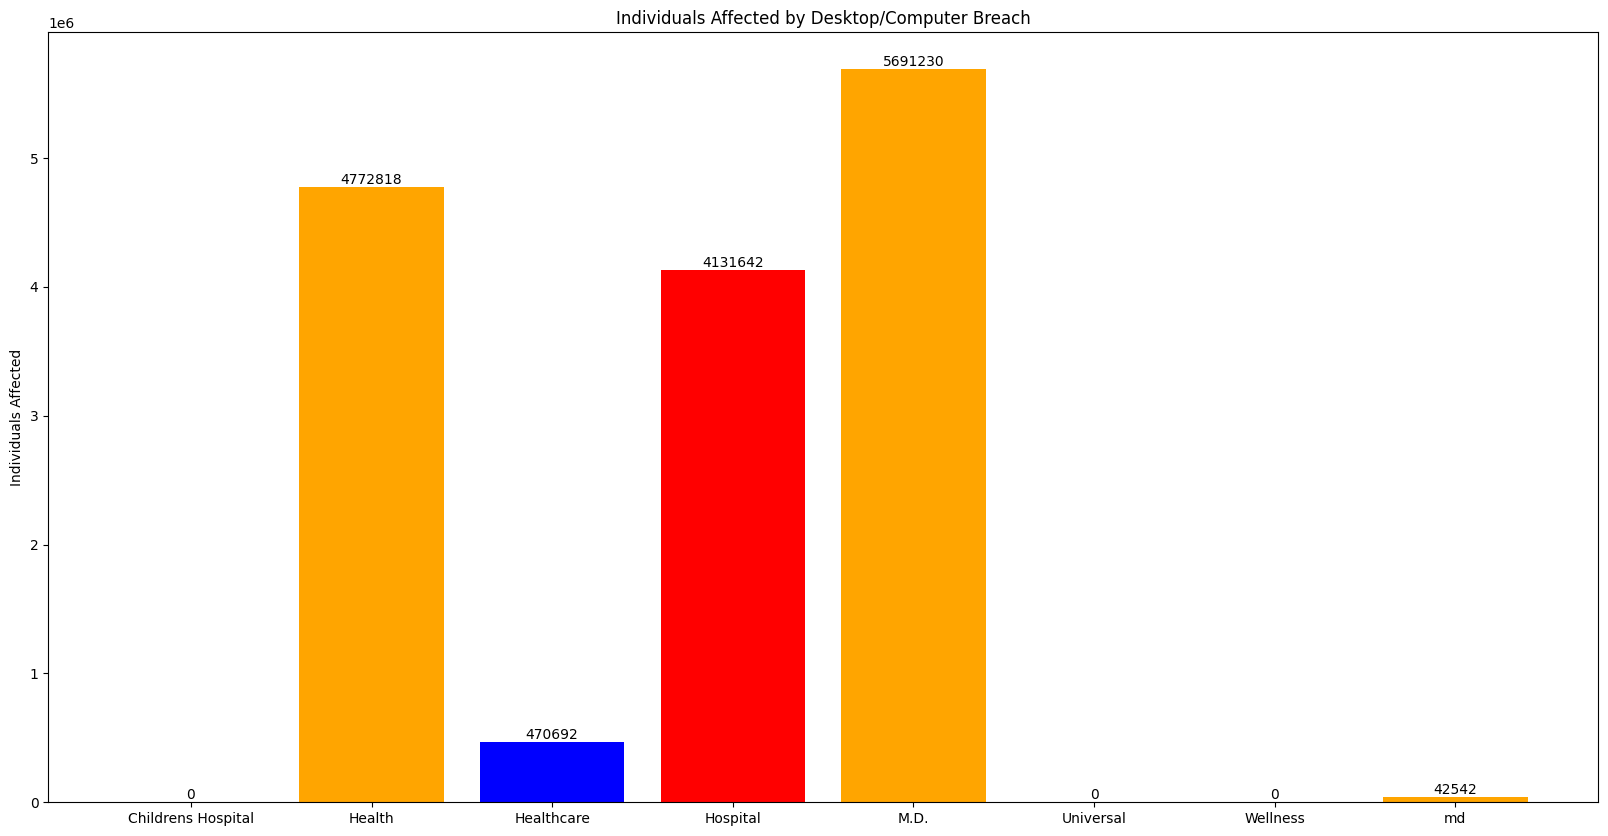

In [39]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Location_of_Breached_Information_Desktop Computer'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Desktop/Computer Breach')

# Display the plot

plt.show()

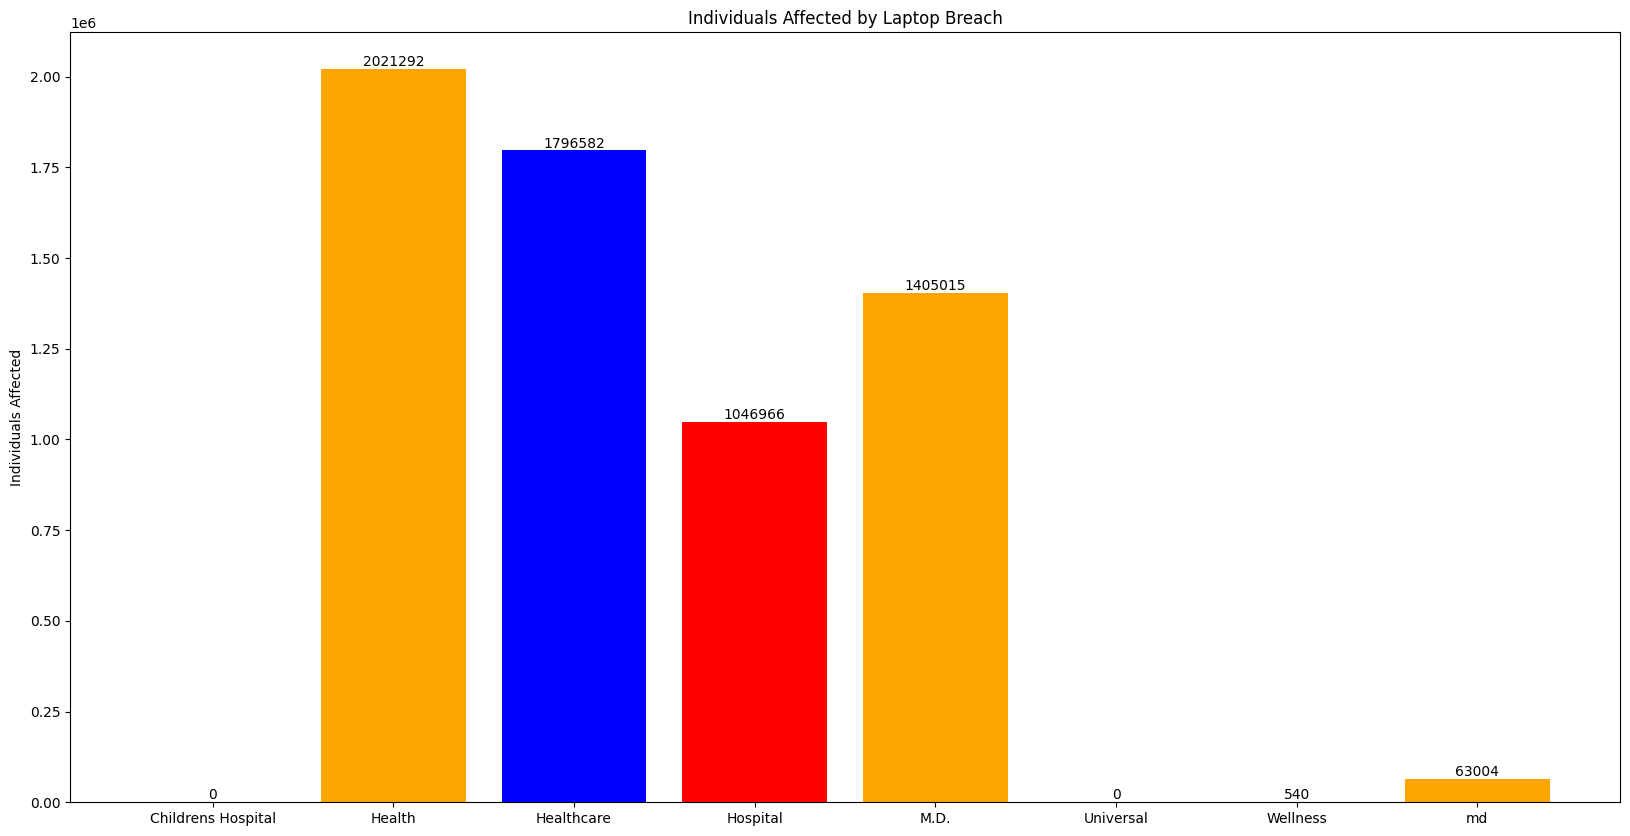

In [34]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Location_of_Breached_Information_Laptop'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Laptop Breach')

# Display the plot

plt.show()

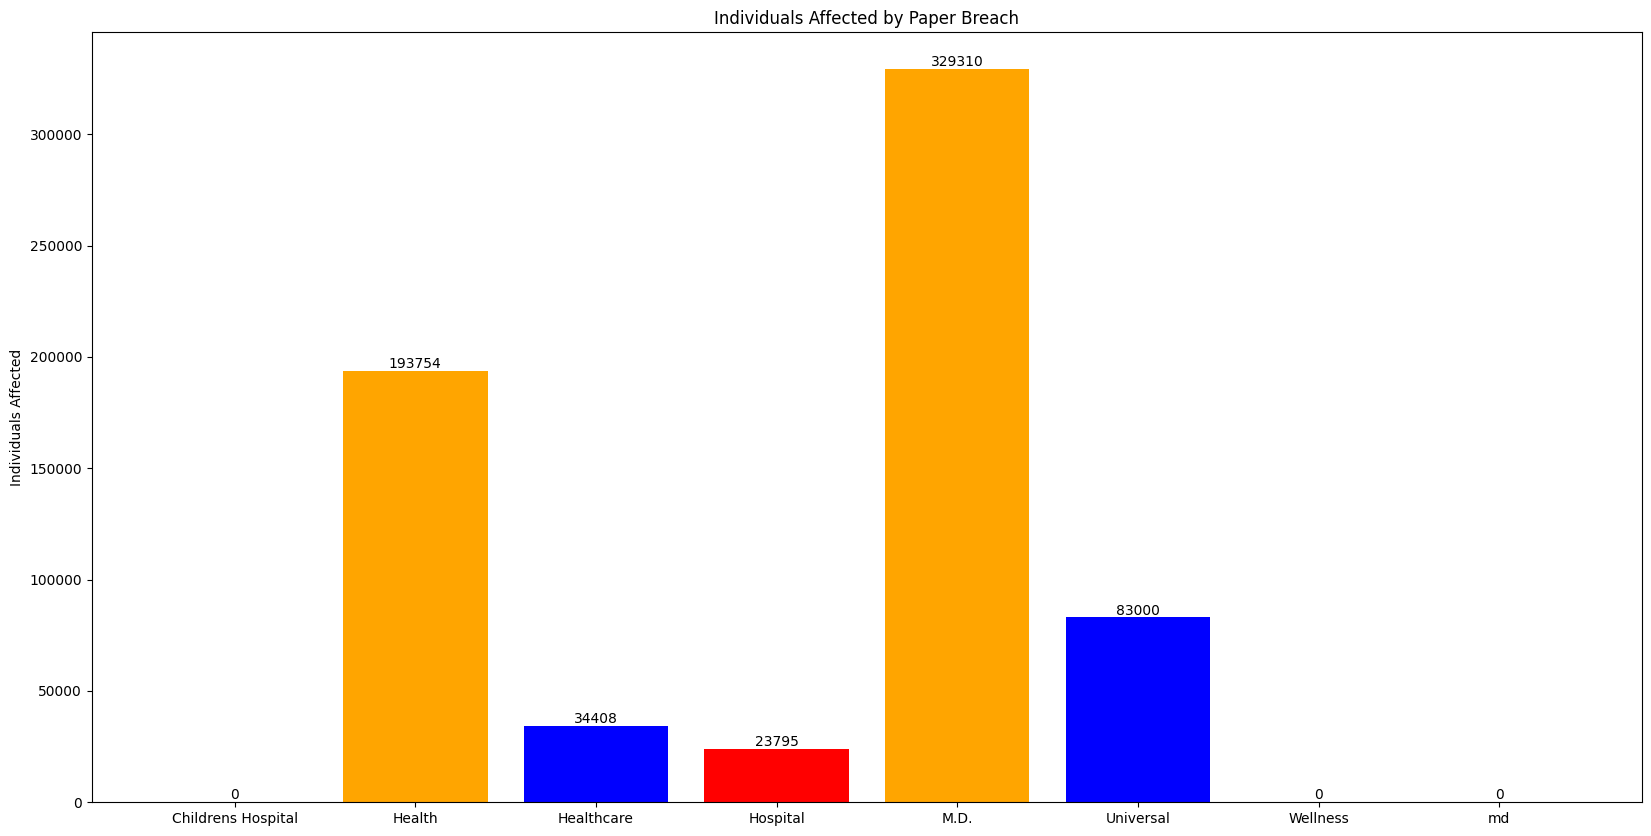

In [36]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Location_of_Breached_Information_Paper'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Paper Breach')

# Display the plot

plt.show()

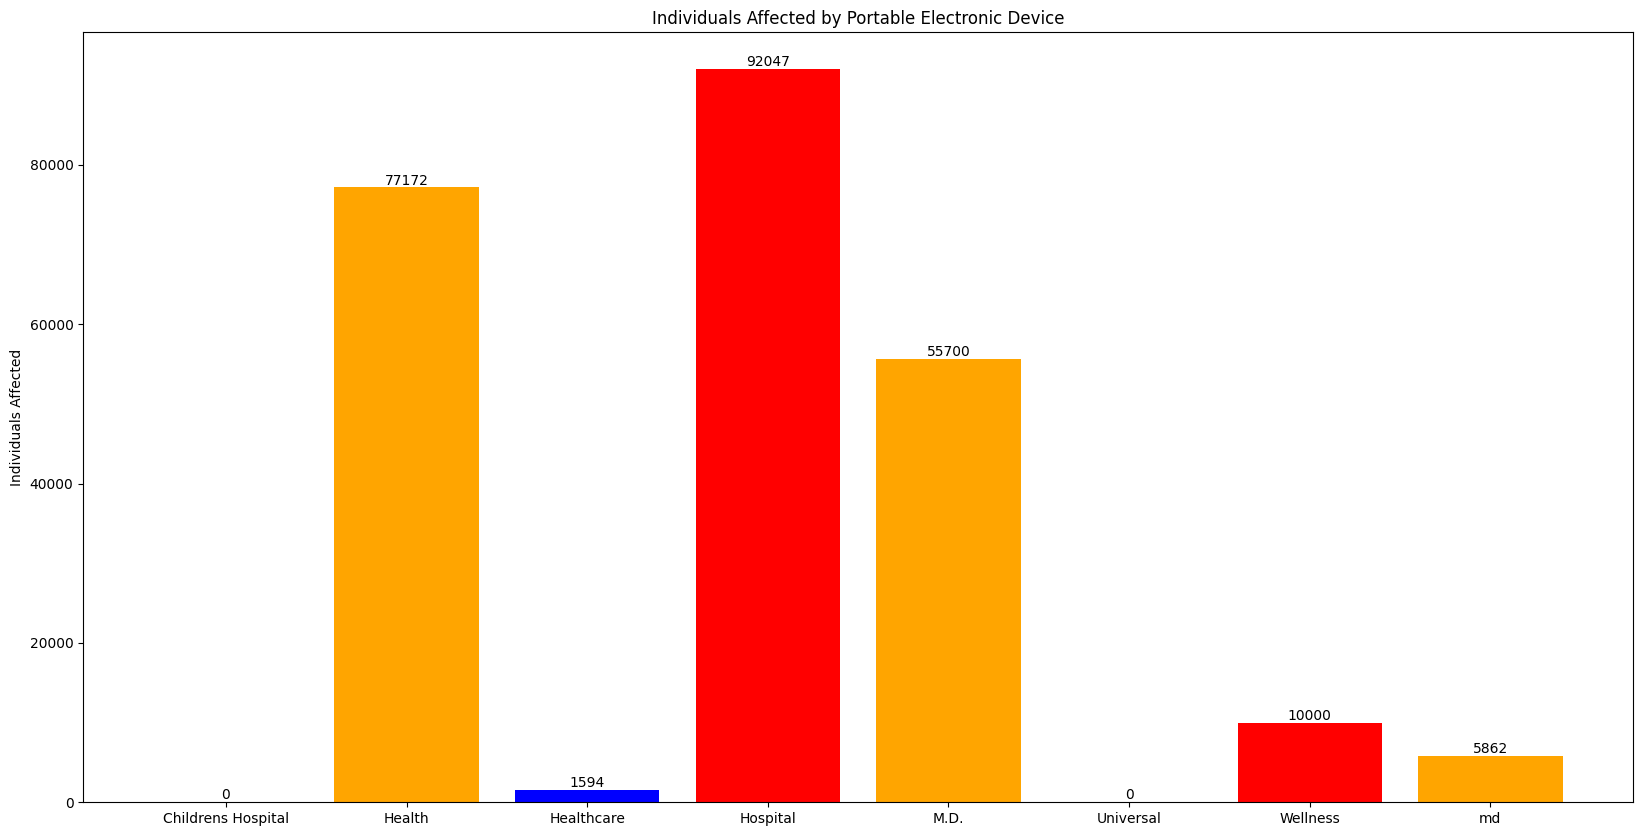

In [37]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Location_of_Breached_Information_Other Portable Electronic Device'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Portable Electronic Device')

# Display the plot

plt.show()

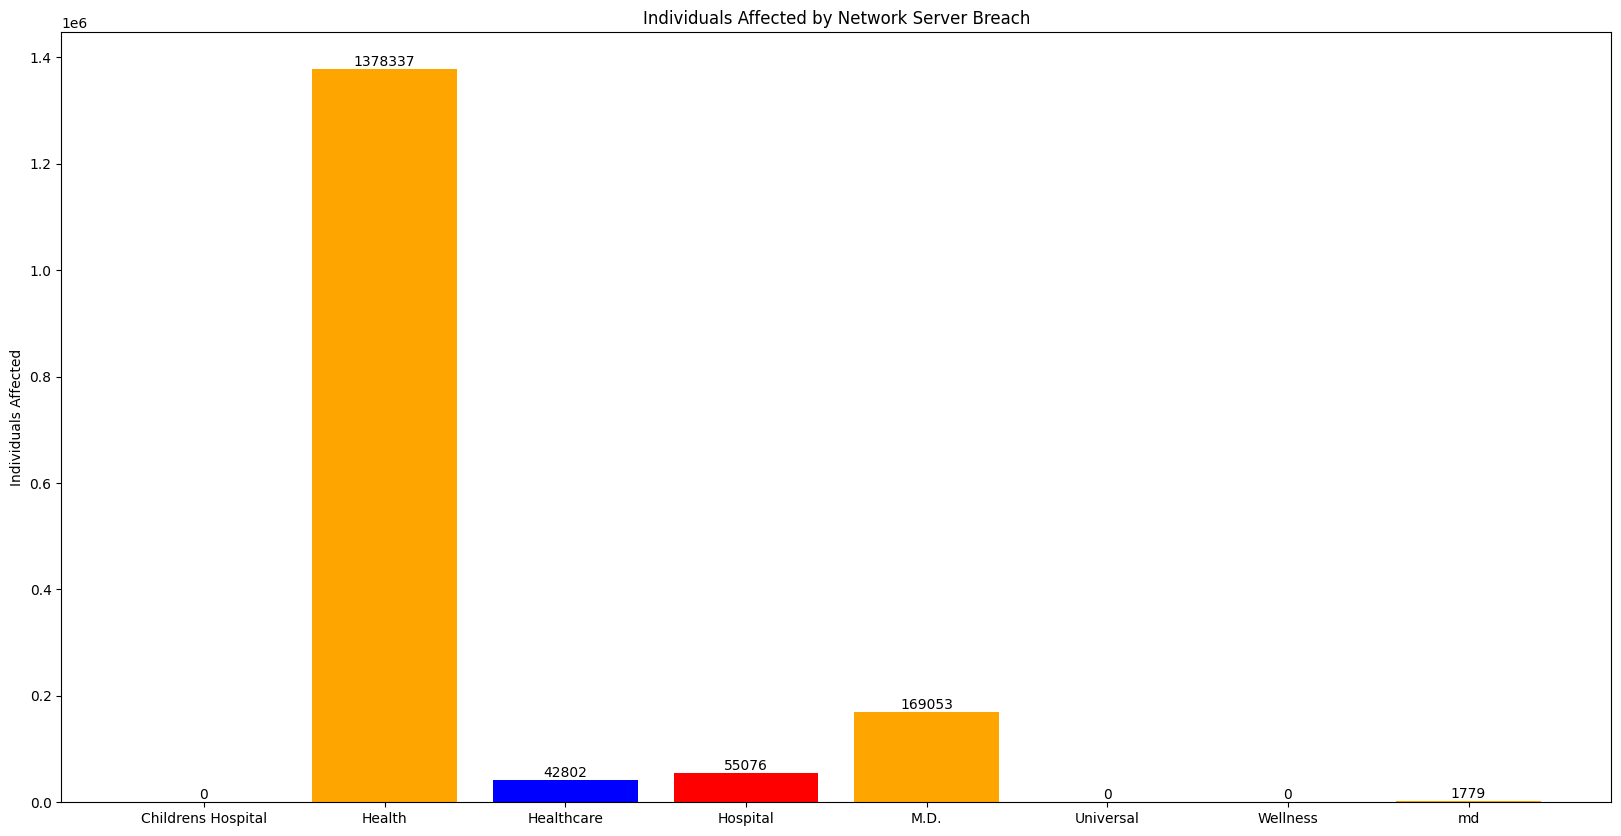

In [38]:
# Define the categories

categories = ['Healthcare', 'Hospital', 'M.D.', 'md', 'Wellness', 'Health', 'Universal', 'Childrens Hospital']


# Use dictionary comprehension to create the dataframes

dfs = {category: df_encoded[(df_encoded['Location_of_Breached_Information_Network Server'] == 1) & (keyword_df[category] == 1)] 
       for category in categories}


# Use dictionary comprehension to calculate the sum for 'Individuals_Affected' in each dataframe

total_affected = {key: df['Individuals_Affected'].sum() for key, df in dfs.items()}


# Sort the categories and corresponding values for plotting

categories = sorted(total_affected.keys())
values = [total_affected[category] for category in categories]

colors = ['red', 'orange', 'blue', 'red', 'orange', 'blue', 'red', 'orange']


# Set the figure size

plt.figure(figsize = (20, 10))


# Create a bar plot with labels

for i, (category, value, color) in enumerate(zip(categories, values, colors)):
    plt.bar([category], [value], color = color)
    plt.text(category, value, str(value), ha = 'center', va = 'bottom')


# Set the x-axis label

plt.xlabel('')

# Set the y-axis label

plt.ylabel('Individuals Affected')

# Set the title

plt.title('Individuals Affected by Network Server Breach')

# Display the plot

plt.show()